In [1]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [3]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [4]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [5]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
29232,29233,30,management,soltero,universitarios,no,1191,no,no,movil,381,11-aug-2021,4,-1,0,Sin Información,no
3165,3166,58,admin.,casado,secundaria/superiores,no,169,no,no,movil,216,15-feb-2021,1,91,4,exito,si
10503,10504,59,retired,casado,priamaria,no,3648,no,no,fijo,1321,19-jun-2021,3,-1,0,Sin Información,si


In [6]:
df_train.loc[df_train['target'] == 'no', 'target'] = 0
df_train.loc[df_train['target'] == 'si', 'target'] = 1
df_train['target'] = df_train['target'].astype(int)

In [7]:
df_train.sample(30)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
27864,27865,39,blue-collar,casado,secundaria/superiores,no,285,si,si,Sin Información,209,6-may-2021,1,-1,0,Sin Información,0
25944,25945,35,management,soltero,universitarios,no,303,si,si,movil,85,28-jul-2021,9,-1,0,Sin Información,0
22703,22704,33,admin.,casado,secundaria/superiores,no,-6,si,no,Sin Información,566,7-may-2021,2,-1,0,Sin Información,0
18792,18793,35,management,casado,universitarios,no,267,si,no,Sin Información,192,7-may-2021,1,-1,0,Sin Información,0
28216,28217,51,blue-collar,casado,priamaria,no,1238,no,no,Sin Información,48,18-jun-2021,10,-1,0,Sin Información,0
26964,26965,35,blue-collar,divorciado,secundaria/superiores,no,52,si,no,Sin Información,574,30-may-2021,1,-1,0,Sin Información,0
19708,19709,34,blue-collar,casado,priamaria,no,147,si,no,Sin Información,80,2-jun-2021,3,-1,0,Sin Información,0
27060,27061,50,services,soltero,secundaria/superiores,no,294,no,no,movil,73,23-jul-2021,1,-1,0,Sin Información,0
27107,27108,30,services,casado,secundaria/superiores,no,80,si,no,Sin Información,185,8-may-2021,2,-1,0,Sin Información,0
31427,31428,42,admin.,casado,secundaria/superiores,no,12,si,no,movil,466,16-apr-2021,4,-1,0,Sin Información,0


In [8]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [9]:
# Reemplaza el valor erróneo en la columna 'educacion'
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')


In [10]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
primaria                  6708
Name: count, dtype: int64


In [11]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
13911,53,housemaid,casado,priamaria,no,2581,no,no,movil,828,1,189,1,sin_exito,1
3569,51,blue-collar,casado,priamaria,no,1126,si,no,movil,326,3,-1,0,Sin Información,0
26283,29,admin.,soltero,secundaria/superiores,no,914,si,no,movil,344,1,-1,0,Sin Información,0


In [12]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
14668,31,-806,205,3,-1,0,0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
18564,43,3186,380,1,88,1,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2986,33,2665,358,2,-1,0,0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
18485,35,0,183,9,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
18231,50,854,198,1,-1,0,0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [13]:
X = df_train.drop(columns=["target"],inplace=False)
y = df_train["target"]

print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (42446, 37)
Tamaño y (42446,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
print("Tamaño X_train",X_train.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train (31834, 37)
Tamaño y_train (31834,)
Tamaño X_test (10612, 37)
Tamaño y_test (10612,)


In [16]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
y_pred_dicotomico = (y_pred > 0.5) *1
print(y_pred_dicotomico)


[1 0 0 ... 1 0 0]


c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
accuracy = accuracy_score(y_test, y_pred_dicotomico)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.895778364116095


In [18]:
# Estandarización controlada

estandarizador = StandardScaler()
estandarizador.fit(X_train)

X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [19]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model_std = LogisticRegression()
model_std.fit(X_train_std, y_train)
y_pred_std = model.predict_proba(X_test_std)[:,1]
y_pred_std_dicotomico = (y_pred_dicotomico > 0.5) *1

accuracy = accuracy_score(y_test, y_pred_std_dicotomico)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.895778364116095


c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
# 'model' es tu modelo entrenado DecisionTreeClassifier y 'df_train' es tu DataFrame original con las características de entrenamiento
# Selecciona todas las características (X) de tu DataFrame original 'df_train'
X_base_datos = df_train.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

X_base_datos_std=estandarizador.fit_transform(X_base_datos)


# Realiza la predicción utilizando el modelo entrenado
model_std.fit(X_base_datos_std,y)
y_pred_base_datos = model_std.predict_proba(X_base_datos_std)

# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df['target_predicho'] = y_pred_base_datos[:,1]
df['target_predicho_dic'] = df['target_predicho'] > 0.5

df.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
37953,37954,50,management,soltero,universitarios,no,490,no,no,movil,273,14-aug-2021,5,-1,0,Sin Información,no,0.135524,False
215,216,51,admin.,casado,secundaria/superiores,no,42,si,no,movil,80,13-may-2021,2,-1,0,Sin Información,no,0.032327,False
6499,6500,42,technician,casado,secundaria/superiores,no,-887,no,no,Sin Información,349,2-jun-2021,4,-1,0,Sin Información,no,0.040785,False


In [21]:
df.sample(10)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho
29289,29290,65,housemaid,casado,primaria,no,715,no,no,movil,323,11-mar-2021,1,-1,0,Sin Información,si,0.096938
32285,32286,48,blue-collar,casado,secundaria/superiores,no,2083,no,no,movil,88,8-aug-2021,3,-1,0,Sin Información,no,0.044307
4787,4788,43,admin.,casado,secundaria/superiores,no,-465,si,si,movil,166,23-jul-2021,1,-1,0,Sin Información,no,0.028701
8771,8772,45,services,soltero,secundaria/superiores,no,1515,no,no,Sin Información,14,20-jun-2021,4,-1,0,Sin Información,no,0.014412
18631,18632,43,services,casado,secundaria/superiores,no,354,si,no,fijo,49,4-feb-2021,2,-1,0,Sin Información,no,0.017997
38508,38509,29,management,casado,universitarios,no,51,si,no,movil,1319,17-jul-2021,5,-1,0,Sin Información,si,0.783361
37024,37025,26,blue-collar,soltero,secundaria/superiores,si,81,no,si,movil,803,8-jul-2021,2,-1,0,Sin Información,si,0.359436
632,633,35,services,divorciado,secundaria/superiores,no,67,si,no,movil,192,5-may-2021,2,-1,0,Sin Información,no,0.041769
12342,12343,36,blue-collar,divorciado,secundaria/superiores,no,52,si,no,movil,152,13-may-2021,1,348,1,sin_exito,no,0.051115
39251,39252,41,services,casado,primaria,no,299,si,no,Sin Información,72,14-may-2021,1,-1,0,Sin Información,no,0.007044


(array([30397.,  5819.,  2015.,  1009.,   741.,   568.,   605.,   518.,
          381.,   393.]),
 array([1.68601370e-05, 1.00015167e-01, 2.00013473e-01, 3.00011780e-01,
        4.00010086e-01, 5.00008393e-01, 6.00006699e-01, 7.00005006e-01,
        8.00003312e-01, 9.00001619e-01, 9.99999925e-01]),
 <BarContainer object of 10 artists>)

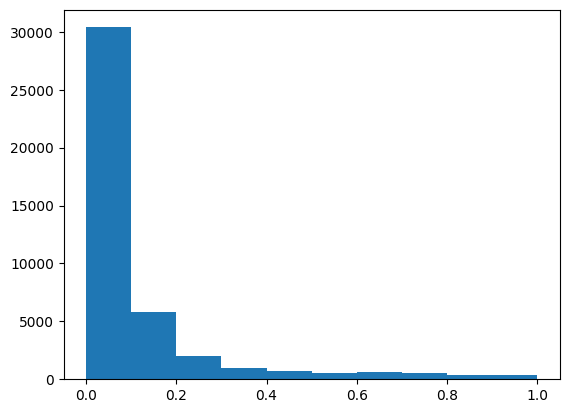

In [22]:
plt.hist(df['target_predicho'])

In [27]:
df[['target','target_predicho','target_predicho_dic','ID']].sample(10)

,target,target_predicho,target_predicho_dic,ID
3021,si,0.579267,True,3022
4462,no,0.004799,False,4463
27289,no,0.151657,False,27290
43409,no,0.092338,False,43410
16846,si,0.282527,False,16847
1941,no,0.191023,False,1942
30861,no,0.003789,False,30862
14055,no,0.069371,False,14056
28620,no,0.207069,False,28621
17206,si,0.627868,True,17207
